# Theoritical part for the formula

In [1]:
# Euclidean Distance
# [(X2-X1)^2 + (Y2-Y1)^2]^1/2

In [2]:
from math import *

In [3]:
zip([2,3],[7,6]) #if there are multiple coordinate we need to zip it

In [4]:
# Creating a Euclidean function for calculating distance between two data points
def eu(x,y):
    return sqrt(sum(pow(a-b,2)for a,b in zip(x,y))) #breaking the formula, here a is x2 and b is x1

In [5]:
eu([2,3],[7,6]) #hence we have calculated the distance

5.830951894845301

# Cluster the data on the basis of Annual Income and Spending Score

 We will find out how many clustering we need using K-means clustering

In [6]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
#Step 1:Import data
df = pd.read_csv(r"E:/Dataset/MallCustomers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
#Step2:Choosing col based upon our problem
data=df[['Annual Income (k$)','Spending Score (1-100)']]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [9]:
X=data.values #Geetting the values of data in X
X.shape

(200, 2)

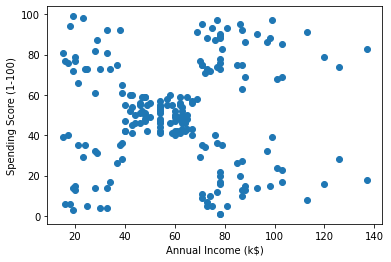

In [10]:
# Plotting the coordinates in scatter plot
plt.scatter(X[:,0],X[:,1])  #we are using indexing/slicing method here indexing[rows,col]=[start:end,start:end]
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [11]:
#step 4: Clustering
from sklearn.cluster import KMeans

In [12]:
#step5:Fitting the model
model=KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [13]:
#step6:Predicting 
y_pred=model.predict(X)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

Since there are 3 classes or clusters

In [14]:
#We are finding the center of the cluster
centers=model.cluster_centers_
centers

array([[87.        , 18.63157895],
       [86.53846154, 82.12820513],
       [44.15447154, 49.82926829]])

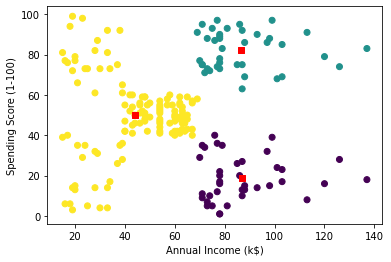

In [15]:
#plotting the centers
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.scatter(centers[:,0],centers[:,1],marker='s',color='r')  #taking x and y coordinate seprately
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Let's find actual number of clusters

In [16]:
kmeans_dict=dict(cluster_no=[],sse=[])
for i in range(1,21):
    model=KMeans(n_clusters=i)
    model.fit(X)
    sse=model.inertia_
    y_pred= model.predict(X)
# Update the dictionary with number clusters and SSE
    kmeans_dict['cluster_no'].append(i)
    kmeans_dict['sse'].append(sse)
    print('Cluster- %d and SSE= %0.2f'%(i,sse))

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster- 1 and SSE= 269981.28
Cluster- 2 and SSE= 181363.60
Cluster- 3 and SSE= 106348.37
Cluster- 4 and SSE= 73679.79
Cluster- 5 and SSE= 44448.46
Cluster- 6 and SSE= 37233.81
Cluster- 7 and SSE= 31632.26
Cluster- 8 and SSE= 25028.02
Cluster- 9 and SSE= 21850.17
Cluster- 10 and SSE= 20035.14
Cluster- 11 and SSE= 17872.84
Cluster- 12 and SSE= 16279.95
Cluster- 13 and SSE= 14343.35
Cluster- 14 and SSE= 13186.29
Cluster- 15 and SSE= 11634.25
Cluster- 16 and SSE= 10866.27
Cluster- 17 and SSE= 10196.75
Cluster- 18 and SSE= 9301.09
Cluster- 19 and SSE= 8753.01
Cluster- 20 and SSE= 8286.46


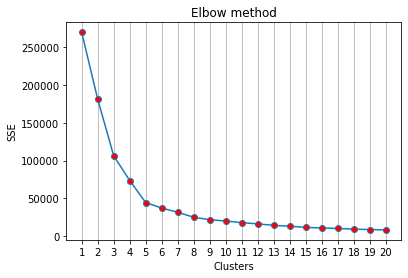

In [17]:
# Elbow method: at which steps the variation gets reduce

plt.plot(kmeans_dict['cluster_no'],kmeans_dict['sse'],marker='o',
markerfacecolor='red')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.title('Elbow method')
plt.xticks(kmeans_dict['cluster_no'])
plt.grid(axis='x')
plt.show()

In [18]:
#Retrain the model with 5 clusters
model=KMeans(n_clusters=5)
model.fit(X)
y_pred= model.predict(X)
y_pred

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 0, 3, 4, 3, 4, 3,
       0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [22]:
centers=model.cluster_centers_
centers

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

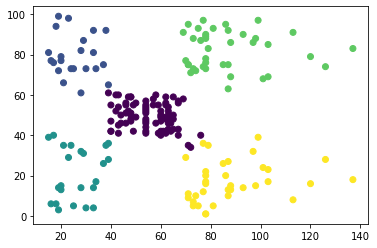

In [20]:
# Plot the data points
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.scatter(centers[:,0],centers[:,1],marker='s', color='r')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Adding the cluster into our origional data

In [ ]:
df['Cluster']=y_pred

In [ ]:
df

In [ ]:
df['Cluster'].values